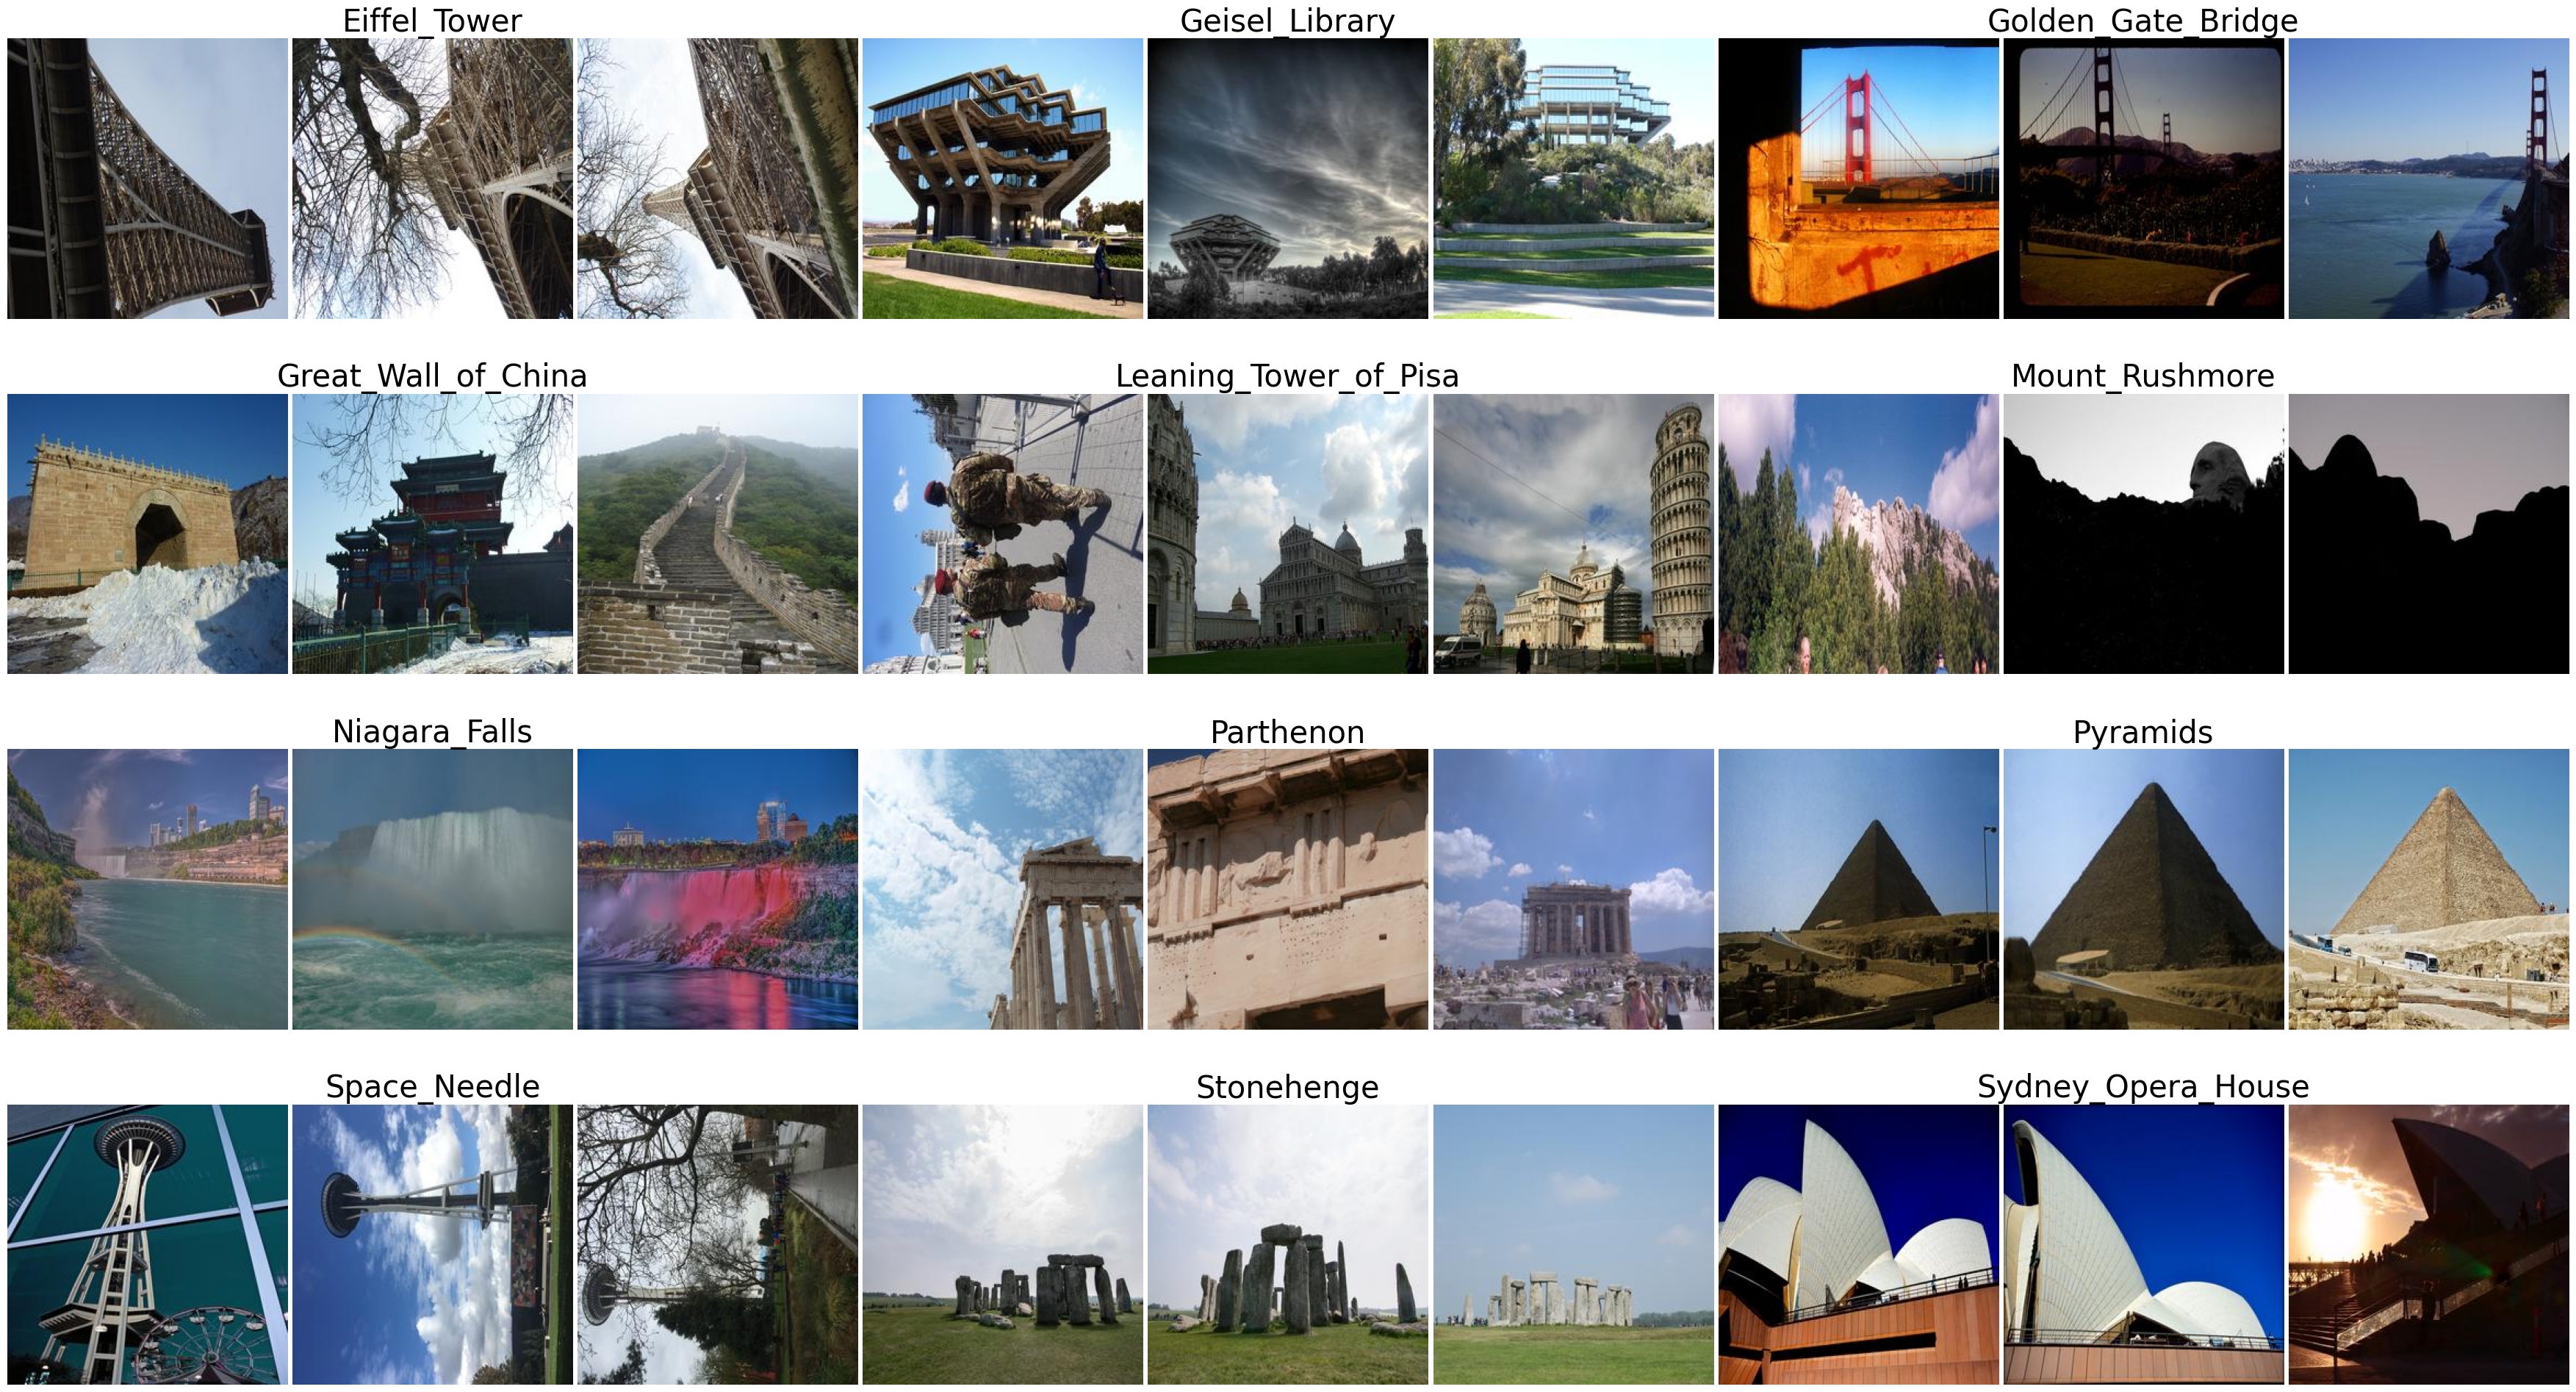

In [5]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import math

# Change this to the Images directory with subdirectories for each class
root_dir = '../data2'

# Set the number of images per class and the number of classes per row
images_per_class = 3
classes_per_row = 3
columns = images_per_class * classes_per_row

# Get the list of class directories
class_directories = [d for d in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, d))]
class_directories.sort()  # Sort the class names

# Calculate the number of rows needed for the subplot
num_classes = len(class_directories)
rows_needed = math.ceil(num_classes / classes_per_row)

# Create a figure with subplots
figure_for_plots = plt.figure(figsize=(35, 5 * rows_needed))  # Adjust the figure size as needed

for index, class_name in enumerate(class_directories):
    # Calculate row position of the current class
    row = index // classes_per_row
    
    # Path to the class folder
    class_folder_path = os.path.join(root_dir, class_name)
    
    # Get the first 'images_per_class' images
    image_files = sorted(os.listdir(class_folder_path))[:images_per_class]
    
    for img_index, image_file in enumerate(image_files):
        image_path = os.path.join(class_folder_path, image_file)
        image = Image.open(image_path)
        
        # Calculate column position for the current image
        col = (index % classes_per_row) * images_per_class + img_index
        
        # Calculate the index for the subplot
        subplot_index = (row * columns) + col + 1
        ax = figure_for_plots.add_subplot(rows_needed, columns, subplot_index)
        ax.imshow(image)
        ax.axis('off')
        
        # Set the title for the first image of each class
        if img_index == 1:
            ax.set_title(class_name, fontsize=30)

plt.subplots_adjust(hspace=0.1)  # Adjust the value as needed for appropriate spacing
plt.tight_layout(pad=.5)
plt.show()